# 🖼️ Analyse des masques de segmentation et adaptation de la palette de couleurs

## Objectifs de ce notebook

Dans ce notebook, nous allons :

- Identifier précisément **quelles classes** (labels uniques) sont présentes dans chacun des masques de segmentation du dataset.
- Déterminer **le nombre total de labels** différents utilisés sur l’ensemble des masques, afin de garantir que chaque type de vêtement ou accessoire pourra être clairement visualisé.
- Construire ou adapter une palette de couleurs qui **associe une couleur vive et distincte à chaque classe** réellement rencontrée dans les annotations et/ou prédictions.
- Préparer le terrain pour des visualisations lisibles (superposition images/masques, comparaison prédiction vs annotation, etc.) et pour les métriques de comparaison à venir.

## Pourquoi cette étape est-elle cruciale ?

- Les masques d’annotation multi-classes utilisent des entiers pour différencier chaque type de vêtement ou d’accessoire, mais ceux-ci ne sont pas toujours identiques à la palette standard proposée par le modèle ou la documentation.
- Une palette de couleurs incomplète empêche la lecture correcte des résultats : des classes peuvent être invisibles, fusionnées, ou mal identifiées lors de la présentation ou de l’analyse.
- En recensant les labels présents et en adaptant la palette, on s’assure que **chaque pièce annotée ou prédite sera représentée par une couleur unique**, offrant une visualisation parfaitement exploitable et professionnelle.

## Organisation du notebook

1. **Analyse automatique des masques** : Inventaire des labels présents dans chacun d’eux, et rapport global des valeurs utilisées dans tout le dataset.
2. **Conception/ajustement de la palette** : Génération d’une palette adaptée au nombre maximum de classes, compatible annotation et prédiction.
3. **Validation** : Test visuel (colorisation de masques) pour s’assurer qu’aucune classe ne manque à l’affichage.
4. **Préparation à l’évaluation quantitative** : Cette base garantira la solidité des métriques et des grilles de comparaison à venir.

In [23]:
# 📊 Analyse des labels uniques dans tous les masques d'annotation

import os
import numpy as np
from PIL import Image
from pathlib import Path

# Chemin vers le dossier de masques (à exécuter depuis /notebooks/)
mask_dir = Path('..') / 'data' / 'raw' / 'annotations'

# Liste des fichiers images (prend en compte png, jpg, jpeg)
mask_files = sorted([f for f in mask_dir.iterdir() if f.suffix.lower() in ['.png', '.jpg', '.jpeg']])

print(f"Analyse de {len(mask_files)} masques présents dans {mask_dir.resolve()}")

results = []
for f in mask_files:
    arr = np.array(Image.open(f))
    unique_labels = np.unique(arr)
    results.append((f.name, unique_labels.tolist(), len(unique_labels)))
    print(f"{f.name} : {len(unique_labels)} labels uniques - Labels = {unique_labels.tolist()}")

# Ensemble global de labels utilisés dans tous les masques
all_labels = sorted(set(l for _, labels, _ in results for l in labels))
print(f"\nNombre total de labels uniques dans tous les masques : {len(all_labels)}")
print(f"Liste des labels uniques totaux : {all_labels}")

Analyse de 50 masques présents dans /Users/daminou/Documents/Formation_IA/Projet_2/fashion-trend-intelligence/data/raw/annotations
mask_0.png : 11 labels uniques - Labels = [0, 2, 4, 6, 9, 10, 11, 12, 13, 15, 16]
mask_1.png : 10 labels uniques - Labels = [0, 1, 2, 4, 5, 6, 9, 10, 11, 16]
mask_10.png : 13 labels uniques - Labels = [0, 2, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16]
mask_11.png : 11 labels uniques - Labels = [0, 1, 2, 4, 5, 9, 10, 11, 12, 13, 15]
mask_12.png : 11 labels uniques - Labels = [0, 2, 4, 6, 9, 10, 11, 12, 13, 14, 15]
mask_13.png : 12 labels uniques - Labels = [0, 2, 4, 5, 6, 8, 9, 10, 11, 14, 15, 16]
mask_14.png : 13 labels uniques - Labels = [0, 2, 3, 4, 6, 8, 9, 10, 11, 12, 13, 14, 15]
mask_15.png : 10 labels uniques - Labels = [0, 2, 4, 6, 9, 10, 11, 13, 15, 16]
mask_16.png : 11 labels uniques - Labels = [0, 2, 7, 9, 10, 11, 12, 13, 14, 15, 16]
mask_17.png : 12 labels uniques - Labels = [0, 2, 4, 6, 9, 10, 11, 12, 13, 14, 15, 16]
mask_18.png : 10 labels uniques 

## ✅ Conclusion sur l’analyse des labels et choix de la palette

L’analyse des 50 masques d’annotation a révélé la présence de **18 labels uniques** (valeurs de 0 à 17) couvrant l’ensemble des classes annotées du dataset.  
Chaque masque individuel combine 8 à 14 classes selon l’image, mais **aucune valeur hors du standard n’a été détectée**. La colorisation peut donc s’appuyer pleinement sur la palette officielle du modèle SegFormer entraîné sur ATR.

---

### 🎨 Palette officielle SegFormer ATR (18 classes)

| Index | Classe            | Couleur RGB       |
|-------|-------------------|-------------------|
| 0     | Background        | [0, 0, 0]         |
| 1     | Hat               | [128, 0, 0]       |
| 2     | Hair              | [255, 0, 0]       |
| 3     | Sunglasses        | [0, 85, 0]        |
| 4     | Upper-clothes     | [170, 0, 51]      |
| 5     | Skirt             | [255, 85, 0]      |
| 6     | Pants             | [0, 0, 85]        |
| 7     | Dress             | [0, 119, 221]     |
| 8     | Belt              | [85, 85, 0]       |
| 9     | Left-shoe         | [0, 85, 85]       |
| 10    | Right-shoe        | [85, 51, 0]       |
| 11    | Face              | [52, 86, 128]     |
| 12    | Left-leg          | [0, 128, 0]       |
| 13    | Right-leg         | [0, 0, 255]       |
| 14    | Left-arm          | [51, 170, 221]    |
| 15    | Right-arm         | [0, 255, 255]     |
| 16    | Bag               | [85, 255, 170]    |
| 17    | Scarf             | [170, 255, 85]    |

---

- **Chaque valeur de label doit être associée à une couleur unique et bien distincte pour la lisibilité.**
- Cette palette garantit une visualisation claire de tous les types de vêtements/accessoires rencontrés dans tes masques annotés.
- Elle est compatible à la fois avec les masques de ground-truth (annotation) et les masques prédits par le modèle SegFormer-clothes ATR.

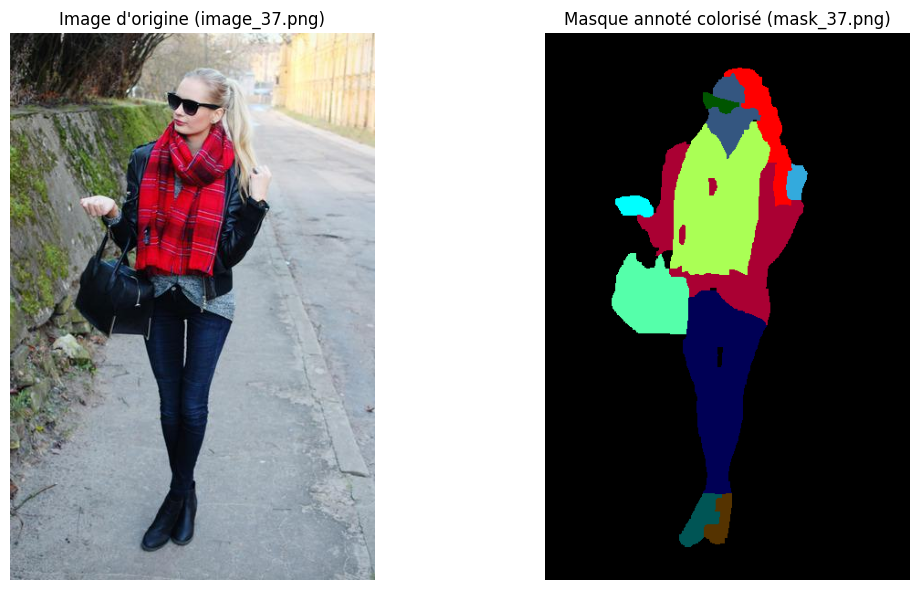

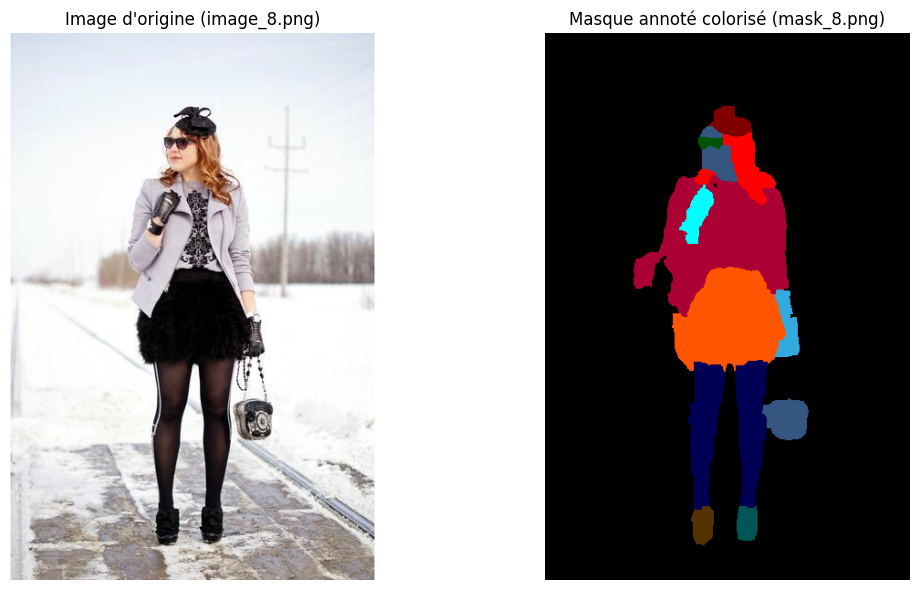

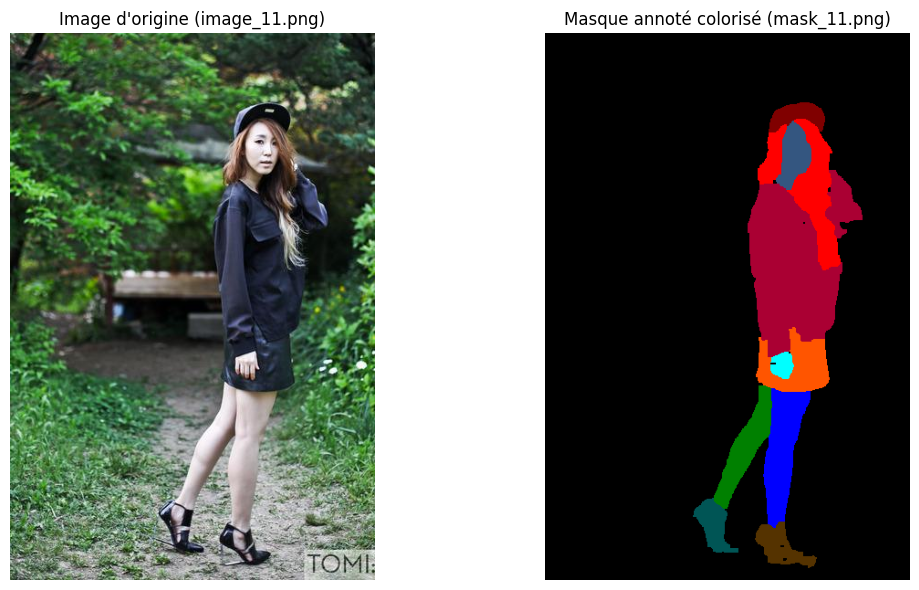

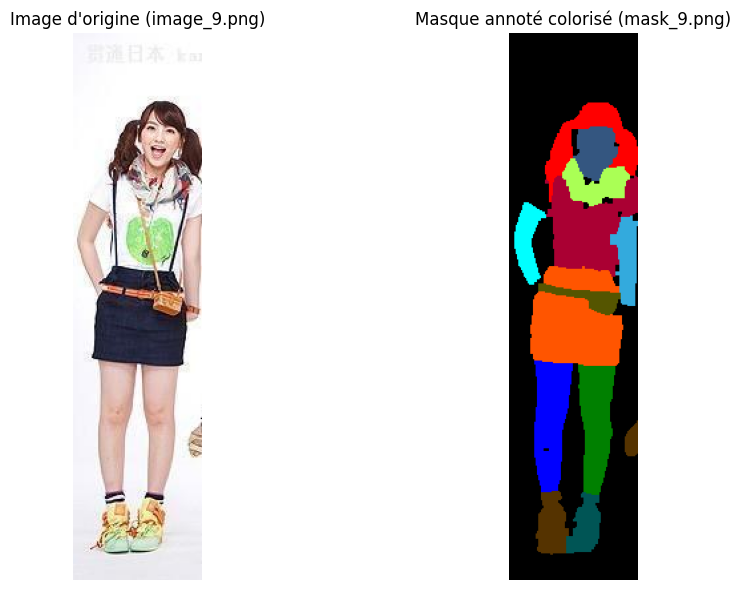

In [24]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from pathlib import Path
import random

# Dossiers
img_dir = Path('..') / 'data' / 'raw' / 'images'
mask_annot_dir = Path('..') / 'data' / 'raw' / 'annotations'
output_dir = Path('..') / 'data' / 'processed' / 'masks_colorized'
output_dir.mkdir(parents=True, exist_ok=True)

# Palette officielle SegFormer ATR (18 classes)
palette = [
    [0, 0, 0],         # 0: Background
    [128, 0, 0],       # 1: Hat
    [255, 0, 0],       # 2: Hair
    [0, 85, 0],        # 3: Sunglasses
    [170, 0, 51],      # 4: Upper-clothes
    [255, 85, 0],      # 5: Skirt
    [0, 0, 85],        # 6: Pants
    [0, 119, 221],     # 7: Dress
    [85, 85, 0],       # 8: Belt
    [0, 85, 85],       # 9: Left-shoe
    [85, 51, 0],       # 10: Right-shoe
    [52, 86, 128],     # 11: Face
    [0, 128, 0],       # 12: Left-leg
    [0, 0, 255],       # 13: Right-leg
    [51, 170, 221],    # 14: Left-arm
    [0, 255, 255],     # 15: Right-arm
    [85, 255, 170],    # 16: Bag
    [170, 255, 85],    # 17: Scarf
]

def colorize_mask(mask):
    color_mask = np.zeros((*mask.shape, 3), dtype=np.uint8)
    for label, color in enumerate(palette):
        color_mask[mask == label] = color
    return color_mask

# Récupérer les fichiers
img_files = sorted(img_dir.glob('*.png'))
annot_files = sorted(mask_annot_dir.glob('*.png'))

if img_files and annot_files:
    # Sélectionner 4 paires au hasard selon l’appariement ordonné
    file_pairs = list(zip(img_files, annot_files))
    if len(file_pairs) < 4:
        raise RuntimeError(f"Seulement {len(file_pairs)} paires trouvées, 4 requises.")
    selected_pairs = random.sample(file_pairs, 4)
    for idx, (img_path, annot_path) in enumerate(selected_pairs):
        # Ouvrir l'image et le masque
        img = np.array(Image.open(img_path))
        mask_annot = np.array(Image.open(annot_path))
        mask_annot_color = colorize_mask(mask_annot)
        
        # Sauvegarder le masque colorisé
        save_path = output_dir / f"{annot_path.stem}_colorized.png"
        Image.fromarray(mask_annot_color).save(save_path)
        
        # Afficher côte à côte
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        axs[0].imshow(img)
        axs[0].set_title(f"Image d'origine ({img_path.name})")
        axs[0].axis('off')
        axs[1].imshow(mask_annot_color)
        axs[1].set_title(f"Masque annoté colorisé ({annot_path.name})")
        axs[1].axis('off')
        plt.tight_layout()
        plt.show()
else:
    print("Aucune image ou masque annoté trouvé dans les dossiers spécifiés.")


## ℹ️ Constat sur la différenciation des "hauts" vestimentaires (veste, t-shirt, pull...)

Après visualisation et analyse des masques colorisés avec la palette officielle du modèle SegFormer-ATR, il apparaît que :

- **Tous les vêtements portés sur le haut du corps** (vestes, t-shirts, chemises, pulls, etc.) sont segmentés et représentés par **une seule et même couleur** sur les masques.
- Cette caractéristique provient du dataset d’entraînement ATR qui regroupe ces différentes pièces sous la classe unique : `upper-clothes`.
- Il n’existe donc **pas de distinction explicite** entre les différents types de hauts dans la taxonomie utilisée par le modèle SegFormer-clothes.

### Limite actuelle

- Cette limitation est structurelle : il n'est pas possible, sans changer de modèle ou de dataset, de colorier vestes et t-shirts avec des couleurs différentes ni de les évaluer séparément.

---

### Positionnement projet

Pour la suite de l’analyse :

- **Je poursuis les expérimentations et les comparaisons de performances avec ce modèle**, en prenant acte que la granularité des classes est imposée par la taxonomie du dataset ATR et du modèle SegFormer utilisé.
- Cette contrainte sera prise en compte dans l’interprétation des résultats, notamment lors de la comparaison des masques annotés et prédits, ainsi que dans la formulation des éventuelles perspectives d’amélioration.

---

⏱️  image_18.png: 5.61 s


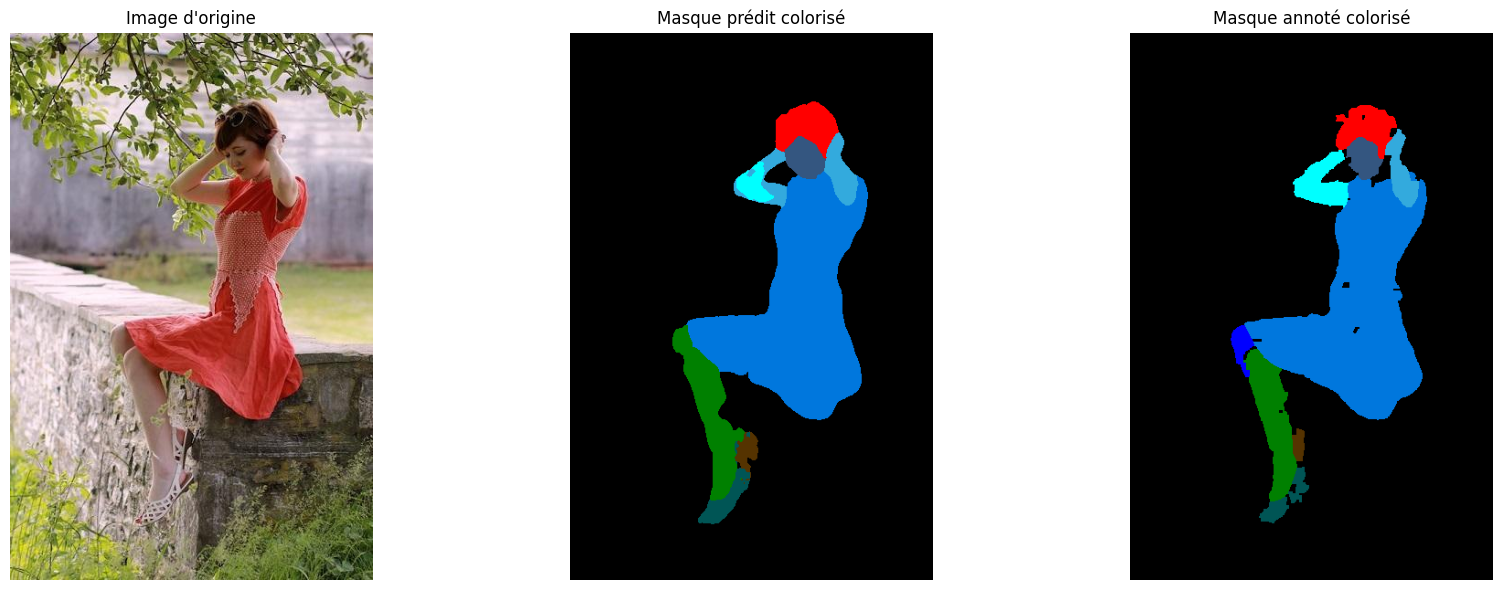

⏱️  image_43.png: 1.43 s


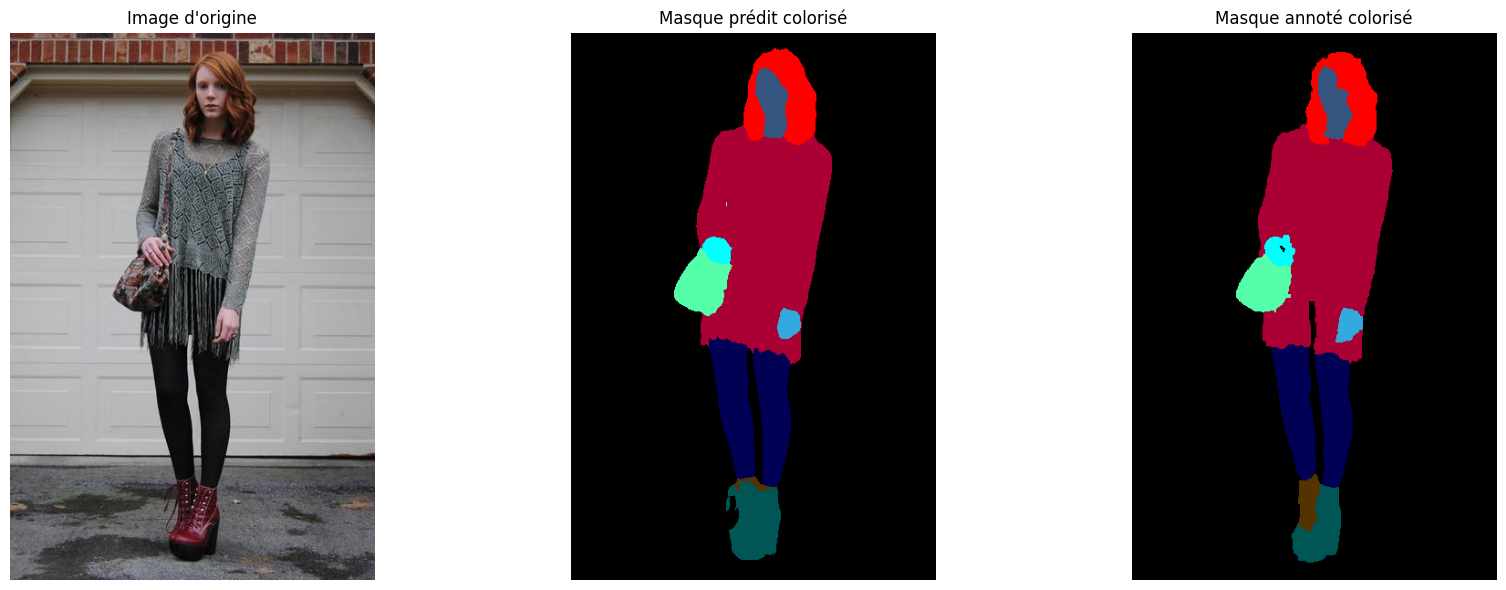

⏱️  image_10.png: 1.74 s


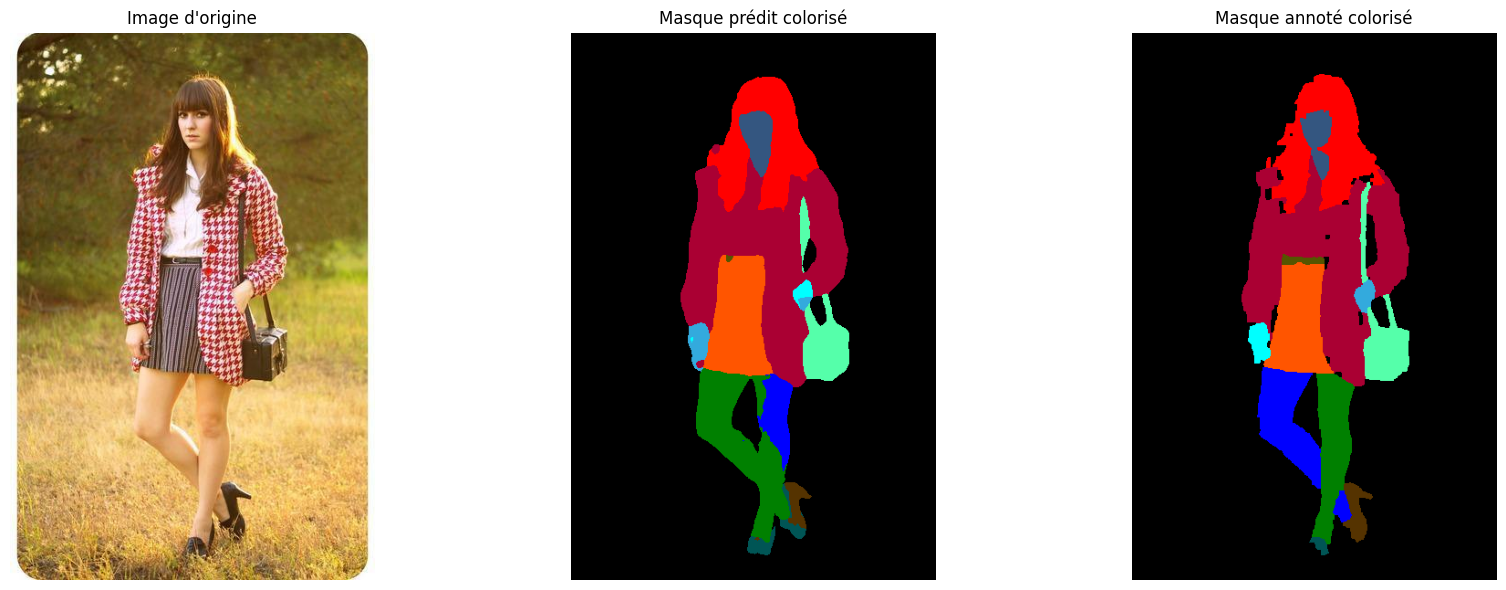

⏱️  image_49.png: 1.93 s


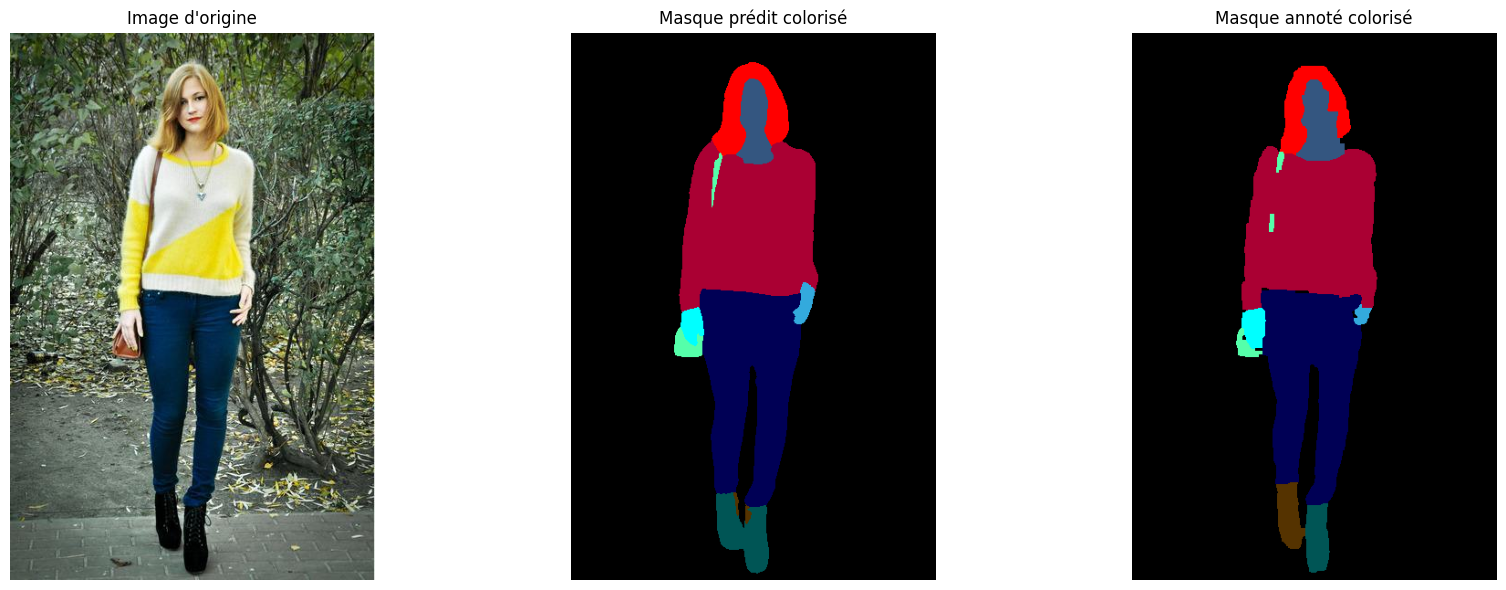


=== Statistiques des temps de réponse API ===
- Nombre d’images traitées : 4
- Moyenne : 2.68 s/image
- Écart-type : 1.70 s
- Min : 1.43 s   |   Max : 5.61 s


In [25]:
import sys
from pathlib import Path
import requests
import time
from io import BytesIO
import base64
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random

# --- Ajouter src/ au PYTHONPATH pour importer utils.py ---
src_path = (Path.cwd().parent / 'src').resolve()
if str(src_path) not in sys.path:
    sys.path.append(str(src_path))

from fashion_trend_intelligence.utils import HF_TOKEN

# --- Définition des dossiers (identiques à ton code) ---

img_dir = Path('..') / 'data' / 'raw' / 'images'
mask_annot_color_dir = Path('..') / 'data' / 'processed' / 'masks_colorized'
mask_pred_dir = Path('..') / 'data' / 'processed'
mask_pred_color_dir = mask_pred_dir / 'masks_colorized'
mask_pred_color_dir.mkdir(parents=True, exist_ok=True)

palette = [
    [0, 0, 0], [128, 0, 0], [255, 0, 0], [0, 85, 0], [170, 0, 51],
    [255, 85, 0], [0, 0, 85], [0, 119, 221], [85, 85, 0], [0, 85, 85],
    [85, 51, 0], [52, 86, 128], [0, 128, 0], [0, 0, 255],
    [51, 170, 221], [0, 255, 255], [85, 255, 170], [170, 255, 85]
]
label_to_index = {
    'Background': 0, 'Hat': 1, 'Hair': 2, 'Sunglasses': 3, 'Upper-clothes': 4,
    'Skirt': 5, 'Pants': 6, 'Dress': 7, 'Belt': 8, 'Left-shoe': 9,
    'Right-shoe': 10, 'Face': 11, 'Left-leg': 12, 'Right-leg': 13,
    'Left-arm': 14, 'Right-arm': 15, 'Bag': 16, 'Scarf': 17
}
def colorize_mask(mask):
    color_mask = np.zeros((*mask.shape, 3), dtype=np.uint8)
    for label, color in enumerate(palette):
        color_mask[mask == label] = color
    return color_mask

def call_hf_api(image_bytes, token, max_retries=3, backoff=10):
    url = "https://api-inference.huggingface.co/models/sayeed99/segformer_b3_clothes"
    headers = {
        "Authorization": f"Bearer {token}",
        "Accept": "application/json",
        "Content-Type": "application/octet-stream"
    }
    for attempt in range(max_retries):
        try:
            resp = requests.post(url, headers=headers, data=image_bytes, timeout=20)
            if resp.status_code == 429:
                print(f"⚠️ Limite de requêtes atteinte (HTTP 429), essai {attempt + 1}/{max_retries} :")
                print(f"   Pause de {backoff * (attempt + 1)}s avant retry.")
                time.sleep(backoff * (attempt + 1))
                continue
            resp.raise_for_status()
            return resp.json()
        except requests.exceptions.Timeout:
            print(f"⏳ Timeout lors de l'appel API (tentative {attempt + 1}/{max_retries}), retry dans {backoff * (attempt + 1)}s.")
            time.sleep(backoff * (attempt + 1))
        except requests.exceptions.RequestException as e:
            print(f"❌ Erreur réseau/API (tentative {attempt + 1}/{max_retries}) : {e}")
            time.sleep(backoff * (attempt + 1))
    raise RuntimeError("Échec : impossible d'obtenir une réponse de l'API HF (cf. logs ci-dessus).")

# --- Mesure des temps de réponse API seulement sur 4 images choisies au hasard ---
image_files = sorted(img_dir.glob('image_*.png'))

if not image_files:
    print("Aucune image trouvée dans le dossier images.")
else:
    if len(image_files) < 4:
        raise RuntimeError(f"Seulement {len(image_files)} images trouvées dans le dossier {img_dir}, 4 requises.")
    image_files = random.sample(image_files, 4)
    response_times = []

    for img_path in image_files:
        image_idx = img_path.stem.split('_')[-1]
        annot_color_path = mask_annot_color_dir / f"mask_{image_idx}_colorized.png"
        pred_mask_filename = f"pred_{image_idx}.png"
        pred_mask_color_filename = f"pred_{image_idx}_colorized.png"
        pred_mask_path = mask_pred_dir / pred_mask_filename
        pred_mask_color_path = mask_pred_color_dir / pred_mask_color_filename

        with open(img_path, 'rb') as f:
            img_bytes = f.read()

        try:
            start_time = time.perf_counter()   # début chrono
            result = call_hf_api(img_bytes, HF_TOKEN)
            end_time = time.perf_counter()     # fin chrono
            duration = end_time - start_time
            response_times.append(duration)
            print(f"⏱️  {img_path.name}: {duration:.2f} s")

            if not isinstance(result, list):
                print(f"Réponse inattendue pour {img_path.name}: {result}")
                continue

            masks_by_class = {}
            height, width = None, None

            for mask_info in result:
                label = mask_info.get('label')
                idx = label_to_index.get(label)
                mask_b64 = mask_info.get('mask')
                if idx is not None and mask_b64:
                    mask_bytes = base64.b64decode(mask_b64)
                    mask_img = Image.open(BytesIO(mask_bytes)).convert("L")
                    mask_np = np.array(mask_img)
                    if height is None or width is None:
                        height, width = mask_np.shape
                    masks_by_class[idx] = mask_np

            mask_indices = np.zeros((height, width), dtype=np.uint8)
            for class_id, mask_np in masks_by_class.items():
                mask_indices[mask_np > 127] = class_id

            Image.fromarray(mask_indices).save(pred_mask_path)
            mask_pred_color = colorize_mask(mask_indices)
            Image.fromarray(mask_pred_color).save(pred_mask_color_path)

            # VISUALISATION (idem)
            fig, axs = plt.subplots(1, 3, figsize=(18, 6))
            axs[0].imshow(Image.open(img_path))
            axs[0].set_title("Image d'origine")
            axs[0].axis('off')
            axs[1].imshow(mask_pred_color)
            axs[1].set_title("Masque prédit colorisé")
            axs[1].axis('off')
            if annot_color_path.exists():
                axs[2].imshow(Image.open(annot_color_path))
                axs[2].set_title("Masque annoté colorisé")
            else:
                axs[2].text(0.5, 0.5, "Manquant", fontsize=14, ha='center')
                axs[2].set_title("Masque annoté colorisé")
            axs[2].axis('off')
            plt.tight_layout()
            plt.show()

        except RuntimeError as e:
            print(f"⛔ Erreur bloquante sur {img_path.name} : {e}")
        except Exception as e:
            print(f"❌ Erreur inattendue lors du traitement de {img_path.name} : {e}")

    # --- Affichage statistiques autour des temps de réponse ---
    if response_times:
        mean = np.mean(response_times)
        std = np.std(response_times)
        mini = np.min(response_times)
        maxi = np.max(response_times)
        print("\n=== Statistiques des temps de réponse API ===")
        print(f"- Nombre d’images traitées : {len(response_times)}")
        print(f"- Moyenne : {mean:.2f} s/image")
        print(f"- Écart-type : {std:.2f} s")
        print(f"- Min : {mini:.2f} s   |   Max : {maxi:.2f} s")


## 🚧 Difficultés rencontrées lors du projet Segmentation Vestimentaire

### 1. Gestion du token Hugging Face et importation dans le notebook

Lors de l’adaptation de mon fichier `utils.py` pour le rendre compatible avec une utilisation sur Google Colab, l’import du token Hugging Face ne fonctionnait plus. Je ne m’en suis pas tout de suite aperçu, car la variable d’environnement était déjà chargée dans mon notebook de test, ce qui masquait le dysfonctionnement. Sur un nouveau notebook, l’import échouait effectivement. Pour éviter ces soucis, je suis simplement revenu à une version antérieure et plus stable de `utils.py`.

---

### 2. Accès à l’API Hugging Face : documentation et URL

J’avais d’abord suivi les indications fournies par ChatGPT pour interroger l’API du modèle, mais après plusieurs échecs frustrants, je suis allé consulter directement la page du projet. J’y ai trouvé la bonne méthode ainsi que l’URL adéquate pour faire fonctionner les requêtes.

---

### 3. Décodage et interprétation des résultats API

Je m’attendais à ce que l’API me renvoie directement une image de segmentation finale. En réalité, la réponse de l’API contient, pour chaque classe (par exemple “pantalon”, “sac”, “cheveux”…), un masque binaire : c’est-à-dire une matrice indiquant, pour chaque pixel de l’image, si la classe est présente (`1`) ou absente (`0`).  
Pour reconstituer le masque de segmentation global (où chaque pixel porte un numéro de classe), il faut “compiler” tous ces masques binaires : pour chaque pixel, on attribue le numéro de la classe correspondante si ce pixel est activé dans le masque de la classe. On obtient ainsi, à la fin, une image d’indices utilisable pour la colorisation, la visualisation ou la comparaison avec l’annotation.

#### Le code Python initial (qui ne fonctionnait pas) :
<code>
    result = call_hf_api(img_bytes, HF_TOKEN)
    mask_b64 = result['segmentation']
    mask_bytes = base64.b64decode(mask_b64)
    mask_pred_img = Image.open(BytesIO(mask_bytes)).convert('L')
</code>
Ce code supposait que la clé `'segmentation'` était directement accessible dans la réponse, ce qui n’était pas le cas.

#### Le code Python corrigé pour exploiter le format réel de la réponse :
<code>
    result = call_hf_api(img_bytes, HF_TOKEN)
    masks_by_class = {}
    height, width = None, None
    
    for mask_info in result:
    label = mask_info.get('label')
    idx = label_to_index.get(label)
    mask_b64 = mask_info.get('mask')
    if idx is not None and mask_b64:
    mask_bytes = base64.b64decode(mask_b64)
    mask_img = Image.open(BytesIO(mask_bytes)).convert("L")
    mask_np = np.array(mask_img)
    if height is None or width is None:
    height, width = mask_np.shape
    masks_by_class[idx] = mask_np
    
    mask_indices = np.zeros((height, width), dtype=np.uint8)
    for class_id, mask_np in masks_by_class.items():
    mask_indices[mask_np > 127] = class_id
</code>
... puis colorisation, sauvegarde, affichage comme avant

---

### 4. Limite de quotas

Les quotas de l’API Hugging Face limitent le nombre d’images que l’on peut traiter à la suite : il faut donc parfois patienter ou étaler les requêtes pour ne pas saturer le service.

---

### 5. Qualité de la segmentation : comparaison visuelle

En comparant mes masques de prédiction avec les masques annotés, j’ai constaté que dans quelques rares cas le modèle prédisait plus finement certains détails (par exemple, la lanière d’un sac bien détectée alors qu’elle manque dans l’annotation). Mais dans la majorité des situations, on observe de nombreuses erreurs : inversions entre gauche et droite, confusions entre des parties distinctes (fusion), ou encore la présence d’artefacts qui ne devraient pas exister.

---

## Conclusion

Ces difficultés m'ont permis d'approfondir ma compréhension de la logique d’inférence, de la gestion des tokens et du fonctionnement réel des sorties API en segmentation. J’ai dû à plusieurs reprises revoir et renforcer la robustesse de ma chaîne d’intégration, et j’en ressors avec une meilleure maîtrise des conventions de nommage, des secrets, et des limites des outils cloud pour l’IA appliquée.


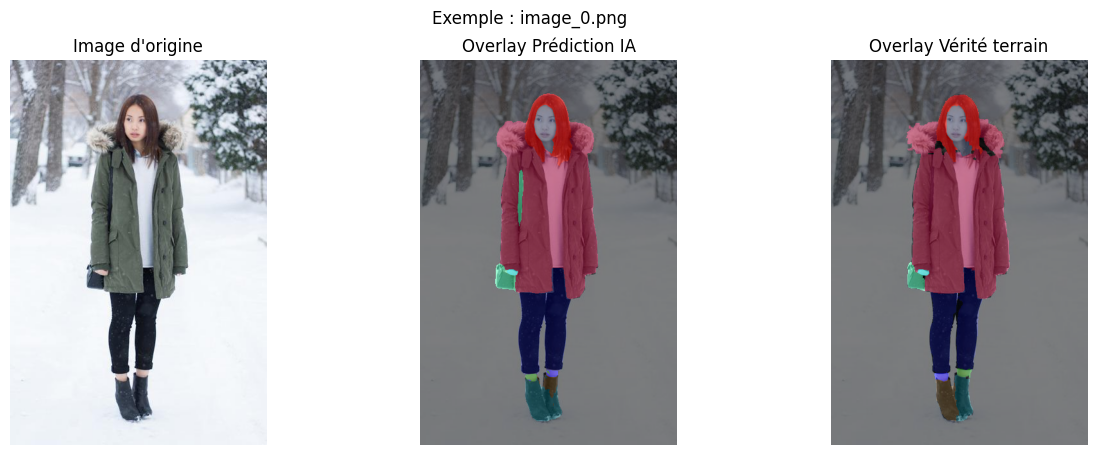

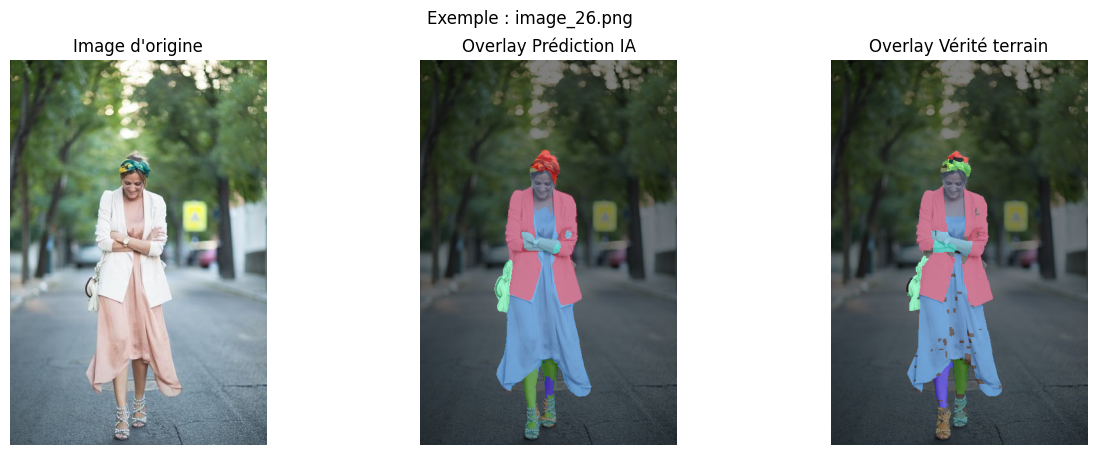

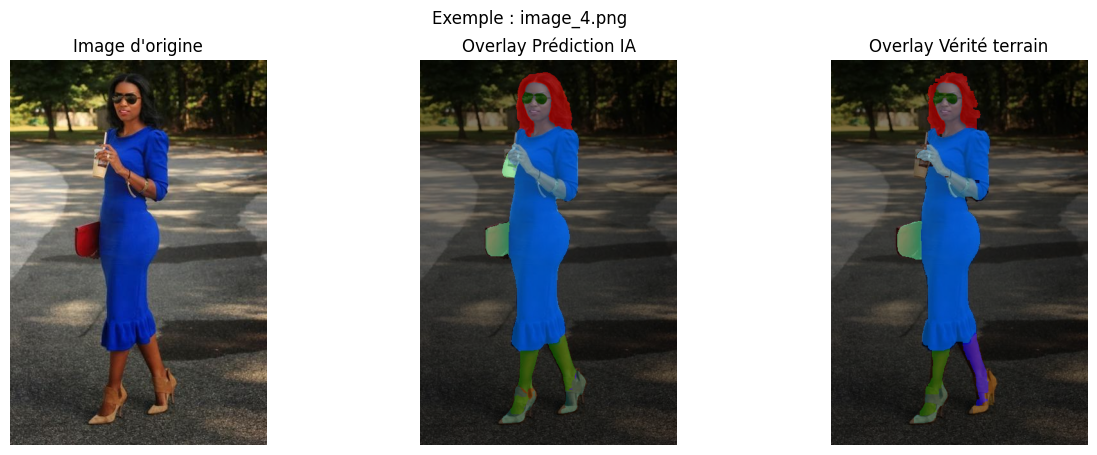

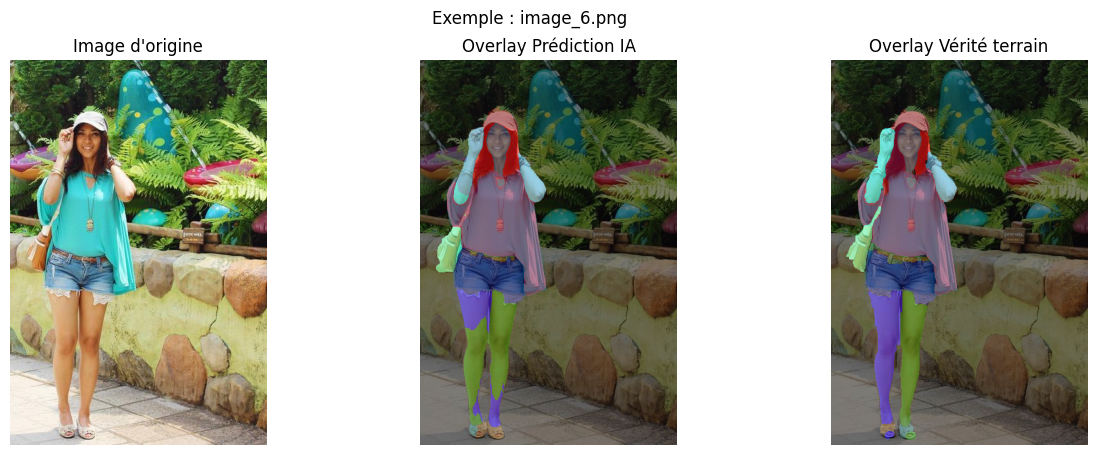

==== Tableau synthétique par classe (ordre du numéro de classe) ====


ClasseId         Classe   IoU_moy  Dice_moy  Precision_moy  Présences
0          0     Background  0.983514  0.991645       0.986978         50
1          1            Hat  0.760955  0.833702       0.887331         14
2          2           Hair  0.719296  0.799127       0.911176         50
3          3     Sunglasses  0.520888  0.591053       0.766606         17
4          4  Upper-clothes  0.881647  0.925450       0.967210         42
5          5          Skirt  0.922658  0.959142       0.968913         10
6          6          Pants  0.859342  0.898484       0.976601         37
7          7          Dress  0.778898  0.821209       0.828393         13
8          8           Belt  0.463693  0.583353       0.590410         11
9          9      Left-shoe  0.288344  0.405492       0.511288         47
10        10     Right-shoe  0.188881  0.280136       0.311910         47
11        11           Face  0.826228  0.900002       0.913616         50
12        12       Left-leg  0.316377  0.406632       0.532671         34
13        13      Right-leg  0.204295  0.276055       0.292886         34
14        14       Left-arm  0.332313  0.424640       0.540980         47
15        15      Right-arm  0.340120  0.418156       0.429311         48
16        16            Bag  0.627199  0.713016       0.840034         27
17        17          Scarf  0.455909  0.530204       0.506443          3


==== Tableau résumé par image ====


img   IoU_moy  Dice_moy  Pixel_acc
0    image_0.png  0.557827  0.622149   0.972371
1    image_1.png  0.626771  0.702057   0.960092
2   image_10.png  0.493288  0.571598   0.938821
3   image_11.png  0.558332  0.610065   0.976096
4   image_12.png  0.730975  0.820387   0.974038
5   image_13.png  0.534921  0.596956   0.972633
6   image_14.png  0.513125  0.583259   0.963358
7   image_15.png  0.457465  0.509161   0.964471
8   image_16.png  0.564885  0.675338   0.950754
9   image_17.png  0.630663  0.712482   0.977471
10  image_18.png  0.612338  0.700980   0.975987
11  image_19.png  0.646910  0.729441   0.975558
12   image_2.png  0.530863  0.600720   0.960400
13  image_20.png  0.664752  0.731050   0.979450
14  image_21.png  0.724561  0.788459   0.955146
15  image_22.png  0.456778  0.516974   0.922483
16  image_23.png  0.457007  0.510463   0.938338
17  image_24.png  0.627075  0.704266   0.984567
18  image_25.png  0.498344  0.530206   0.964417
19  image_26.png  0.410714  0.488489   0.963963
20  image_27.png  0.499992  0.587140   0.954137
21  image_28.png  0.427585  0.463654   0.961758
22  image_29.png  0.557171  0.638655   0.936004
23   image_3.png  0.536719  0.629147   0.969421
24  image_30.png  0.476427  0.530456   0.957263
25  image_31.png  0.568364  0.636763   0.882775
26  image_32.png  0.689630  0.768689   0.976163
27  image_33.png  0.666596  0.740042   0.976446
28  image_34.png  0.443308  0.476067   0.971304
29  image_35.png  0.551239  0.636383   0.955421
30  image_36.png  0.739138  0.824822   0.983250
31  image_37.png  0.764359  0.839015   0.973429
32  image_38.png  0.590023  0.665753   0.961567
33  image_39.png  0.447413  0.485733   0.940375
34   image_4.png  0.591681  0.666845   0.970225
35  image_40.png  0.630161  0.698830   0.968754
36  image_41.png  0.516434  0.576235   0.957328
37  image_42.png  0.549289  0.638326   0.936763
38  image_43.png  0.776059  0.843450   0.981954
39  image_44.png  0.498329  0.564519   0.980304
40  image_45.png  0.754184  0.798175   0.979771
41  image_46.png  0.451873  0.514671   0.962750
42  image_47.png  0.655526  0.731622   0.970688
43  image_48.png  0.541376  0.626454   0.955004
44  image_49.png  0.655154  0.745391   0.977217
45   image_5.png  0.572813  0.638451   0.983875
46   image_6.png  0.522433  0.623677   0.950858
47   image_7.png  0.513532  0.589136   0.934013
48   image_8.png  0.501813  0.572239   0.960912
49   image_9.png  0.555060  0.681960   0.830447


==== Scores globaux (moyenne toutes images et classes) ====
Mean IoU:   0.571
Mean Dice:  0.643
Mean Pixel accuracy: 0.959

⚠️  Classes avec IoU moyen <0.4 (à surveiller) :
Left-shoe, Right-shoe, Left-leg, Right-leg, Left-arm, Right-arm


In [26]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
import random

# --------- Répertoires d'entrée et de sortie ---------
image_dir = Path('..') / 'data' / 'raw' / 'images'
mask_pred_dir = Path('..') / 'data' / 'processed'
mask_annot_dir = Path('..') / 'data' / 'raw' / 'annotations'

# --------- Fonctions métriques ---------
def calculate_iou(pred, true, class_idx):
    pred_bin = (pred == class_idx)
    true_bin = (true == class_idx)
    intersection = np.logical_and(pred_bin, true_bin).sum()
    union = np.logical_or(pred_bin, true_bin).sum()
    return intersection / union if union > 0 else np.nan

def calculate_dice(pred, true, class_idx):
    pred_bin = (pred == class_idx)
    true_bin = (true == class_idx)
    intersection = np.logical_and(pred_bin, true_bin).sum()
    denom = pred_bin.sum() + true_bin.sum()
    return 2 * intersection / denom if denom > 0 else np.nan

def calculate_pixel_accuracy(pred, true):
    return (pred == true).sum() / true.size

# label_to_index et colorize_mask doivent être définis auparavant dans le notebook

index_to_label = {v: k for k, v in label_to_index.items()}
all_classes = list(label_to_index.values())

# --------- Calcul des scores ---------
metrics_per_class = {c: {'IoU': [], 'Dice': [], 'Precision': []} for c in all_classes}
summary_per_image = []

images = sorted(image_dir.glob('image_*.png'))

# On choisit 4 images au hasard pour la visualisation
if len(images) < 4:
    raise RuntimeError(f"Seulement {len(images)} images trouvées dans le dossier {image_dir}, 4 requises.")
random_images = set(random.sample(images, 4))

for img_path in images:
    idx = img_path.stem.split('_')[-1]
    pred_path = mask_pred_dir / f'pred_{idx}.png'
    true_path = mask_annot_dir / f'mask_{idx}.png'

    if not (pred_path.exists() and true_path.exists()):
        continue

    pred_mask = np.array(Image.open(pred_path))
    true_mask = np.array(Image.open(true_path))

    ious, dices, accs = [], [], []

    for cid in all_classes:
        iou = calculate_iou(pred_mask, true_mask, cid)
        dice = calculate_dice(pred_mask, true_mask, cid)
        nb_true = (true_mask == cid).sum()
        acc = ((pred_mask == cid) & (true_mask == cid)).sum() / nb_true if nb_true > 0 else np.nan
        metrics_per_class[cid]['IoU'].append(iou)
        metrics_per_class[cid]['Dice'].append(dice)
        metrics_per_class[cid]['Precision'].append(acc)
        ious.append(iou)
        dices.append(dice)
        accs.append(acc)

    pixel_acc = calculate_pixel_accuracy(pred_mask, true_mask)
    summary_per_image.append({
        'img': img_path.name,
        'IoU_moy': np.nanmean(ious),
        'Dice_moy': np.nanmean(dices),
        'Pixel_acc': pixel_acc
    })

    # Visualisation overlays : ne lancer que pour les 4 images tirées au sort
    if img_path in random_images:
        img_arr = np.array(Image.open(img_path).convert("RGB"))
        mask_pred_color = colorize_mask(pred_mask)
        mask_true_color = colorize_mask(true_mask)
        overlay_pred = (img_arr * 0.5 + mask_pred_color * 0.5).astype(np.uint8)
        overlay_true = (img_arr * 0.5 + mask_true_color * 0.5).astype(np.uint8)
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(img_arr)
        plt.title("Image d'origine")
        plt.axis('off')
        plt.subplot(1, 3, 2)
        plt.imshow(overlay_pred)
        plt.title("Overlay Prédiction IA")
        plt.axis('off')
        plt.suptitle(f"Exemple : {img_path.name}")
        plt.subplot(1, 3, 3)
        plt.imshow(overlay_true)
        plt.title("Overlay Vérité terrain")
        plt.axis('off')
        plt.show()

# --------- Synthèse des scores par classe ---------
classe_stats = []
for cid in all_classes:
    ious = [x for x in metrics_per_class[cid]['IoU'] if not np.isnan(x)]
    dices = [x for x in metrics_per_class[cid]['Dice'] if not np.isnan(x)]
    accs = [x for x in metrics_per_class[cid]['Precision'] if not np.isnan(x)]
    classe_stats.append({
        'Classe': index_to_label[cid],
        'IoU_moy': np.mean(ious) if ious else np.nan,
        'Dice_moy': np.mean(dices) if dices else np.nan,
        'Precision_moy': np.mean(accs) if accs else np.nan,
        'Présences': len(ious)
    })

df_cls = pd.DataFrame(classe_stats)
df_cls = df_cls.reset_index().rename(columns={'index': 'ClasseId'})
df_cls_sorted = df_cls.sort_values('ClasseId', ascending=True).reset_index(drop=True)

print("==== Tableau synthétique par classe (ordre du numéro de classe) ====")
display(df_cls_sorted)

# --------- Synthèse par image ---------
df_img = pd.DataFrame(summary_per_image)
print("\n==== Tableau résumé par image ====")
display(df_img)

# --------- Scores globaux ---------
print("\n==== Scores globaux (moyenne toutes images et classes) ====")
print(f"Mean IoU:   {df_img['IoU_moy'].mean():.3f}")
print(f"Mean Dice:  {df_img['Dice_moy'].mean():.3f}")
print(f"Mean Pixel accuracy: {df_img['Pixel_acc'].mean():.3f}")

# --------- Analyse des faiblesses ---------
classe_basse = df_cls_sorted[df_cls_sorted['IoU_moy'] < 0.4]['Classe'].tolist()
if classe_basse:
    print("\n⚠️  Classes avec IoU moyen <0.4 (à surveiller) :")
    print(", ".join(classe_basse))
else:
    print("\nAucune classe avec IoU catastrophique (<0.4)")


## Interprétation des résultats de validation

### 1. Calcul des métriques (IoU, Dice, Précision pixel)

- **Intersection over Union (IoU)** :  
  Mesure la part de pixels prédits correctement pour chaque classe, sur tous les pixels annotés comme cette classe ou prédits comme cette classe.  
  - Formule : \( IoU = \frac{\text{Aire commune (prédiction ∩ annotation)}}{\text{Aire totale (prédiction ∪ annotation)}} \)
  - Exemple : Pour la classe *Upper-clothes*, IoU = 0.88 ; pour *Right-shoe*, IoU = 0.19.

- **Dice Score** :  
  Met l'accent sur la justesse des détections, particulièrement pour des petites zones.  
  - Formule : \( Dice = \frac{2 \times |\text{Prédiction} \cap \text{Vérité}|}{|\text{Prédiction}| + |\text{Vérité terrain}|} \)
  - Exemple : *Face* a un Dice moyen de 0.90 ; *Left-leg* a 0.41.

- **Précision pixel** :  
  % de pixels de toute l’image attribués à la bonne classe, toutes classes confondues.  
  - Formule : Précision = \( \frac{\text{pixels bien prédits}}{\text{tous les pixels}} \)
  - Exemple : Sur *image_0.png* précision pixel = 0.97.

---

### 2. Pertinence des métriques pour la segmentation vestimentaire

- **IoU et Dice Score** sont directement liées au découpage des vêtements dans chaque image, même sur des zones petites ou rares (accessoires). Elles sont utilisées dans tous les travaux de segmentation d’images "pixel-wise".
- **Précision pixel** donne une idée globale de la performance, mais peut masquer des erreurs graves sur les petites classes (exemple: si 90% de l’image est l’arrière-plan, un modèle qui ne segmente rien de rare peut quand même afficher une bonne "précision globale").
- Sur ton projet, la complémentarité des métriques te permet de démontrer au client non seulement la qualité générale, mais aussi d’objectiver les forces/faiblesses classe par classe.

---

### 3. Exemples chiffrés – Rapport synthétique

#### a. Tableau des scores par classe

| ClasseId | Classe         | IoU_moy | Dice_moy | Precision_moy | Présences |
|:--------:|:--------------|:-------:|:--------:|:-------------:|:---------:|
| 0        | Background    | 0.98    | 0.99     | 0.99          | 50        |
| 1        | Hat           | 0.76    | 0.83     | 0.89          | 14        |
| 2        | Hair          | 0.72    | 0.80     | 0.91          | 50        |
| 3        | Sunglasses    | 0.52    | 0.59     | 0.77          | 17        |
| 4        | Upper-clothes | 0.88    | 0.93     | 0.97          | 42        |
| 5        | Skirt         | 0.92    | 0.96     | 0.97          | 10        |
| 6        | Pants         | 0.86    | 0.90     | 0.98          | 37        |
| 7        | Dress         | 0.78    | 0.82     | 0.83          | 13        |
| 8        | Belt          | 0.46    | 0.58     | 0.59          | 11        |
| 9        | Left-shoe     | 0.29    | 0.41     | 0.51          | 47        |
| 10       | Right-shoe    | 0.19    | 0.28     | 0.31          | 47        |
| 11       | Face          | 0.83    | 0.90     | 0.91          | 50        |
| 12       | Left-leg      | 0.32    | 0.41     | 0.53          | 34        |
| 13       | Right-leg     | 0.20    | 0.28     | 0.29          | 34        |
| 14       | Left-arm      | 0.33    | 0.42     | 0.54          | 47        |
| 15       | Right-arm     | 0.34    | 0.42     | 0.43          | 48        |
| 16       | Bag           | 0.63    | 0.71     | 0.84          | 27        |
| 17       | Scarf         | 0.46    | 0.53     | 0.51          | 3         |

**Classes "à surveiller" (IoU moyen < 0.4) :**  
Left-shoe, Right-shoe, Left-leg, Right-leg, Left-arm, Right-arm

---

#### b. Exemple de scores par image

| Image           | IoU_moy | Dice_moy | Pixel_acc |
|-----------------|---------|----------|-----------|
| image_0.png     | 0.56    | 0.62     | 0.97      |
| image_13.png    | 0.53    | 0.60     | 0.97      |
| image_32.png    | 0.69    | 0.77     | 0.98      |
| image_49.png    | 0.66    | 0.75     | 0.98      |
| ...             | ...     | ...      | ...       |

---

#### c. Synthèse des scores globaux du projet

- **Mean IoU (moyenne sur toutes les images/classes)** : **0.571**
- **Mean Dice** : **0.643**
- **Mean Pixel accuracy** : **0.959**

---

### 4. Exploitation pour améliorer le projet et argumenter auprès des parties prenantes

- **Pilotage projet et détection des axes d'amélioration**
  - Identification des classes problématiques : focus annotation ou ajustement du modèle sur les chaussures, bras et jambes, par exemple.
  - Synthèse claire pour prioriser les efforts d’amélioration ou de collecte de données.
  - Comparaison chiffrée entre différentes versions de modèle ou d’API possibles.

- **Dialogue client / équipe non technique**
  - Explications accessibles : “La solution segmente très bien les vêtements majeurs (pantalons, jupes, vestes), mais reste perfectible sur les petits objets.”
  - Preuves visuelles et chiffrées de la plus-value : 95%+ de pixels bien classés sur la majorité des images.
  - Les cas « faibles » sont explicitement repérés et expliqués, ce qui balaie tout soupçon de sur-promesse.

- **Rapport et slides**
  - Les tableaux triés par numéro de classe, les overlays visuels et la synthèse globale forment ensemble un support convaincant.
  - Toute limite ou biais du modèle est assumé, objectivé, argumenté.

---

**Résumé**  
Les métriques et illustrations sont pertinentes pour piloter, optimiser, justifier et valoriser la pipeline de segmentation vestimentaire—auprès d’un public technique ou non technique.


In [ ]:
# Création des visuels de présentation


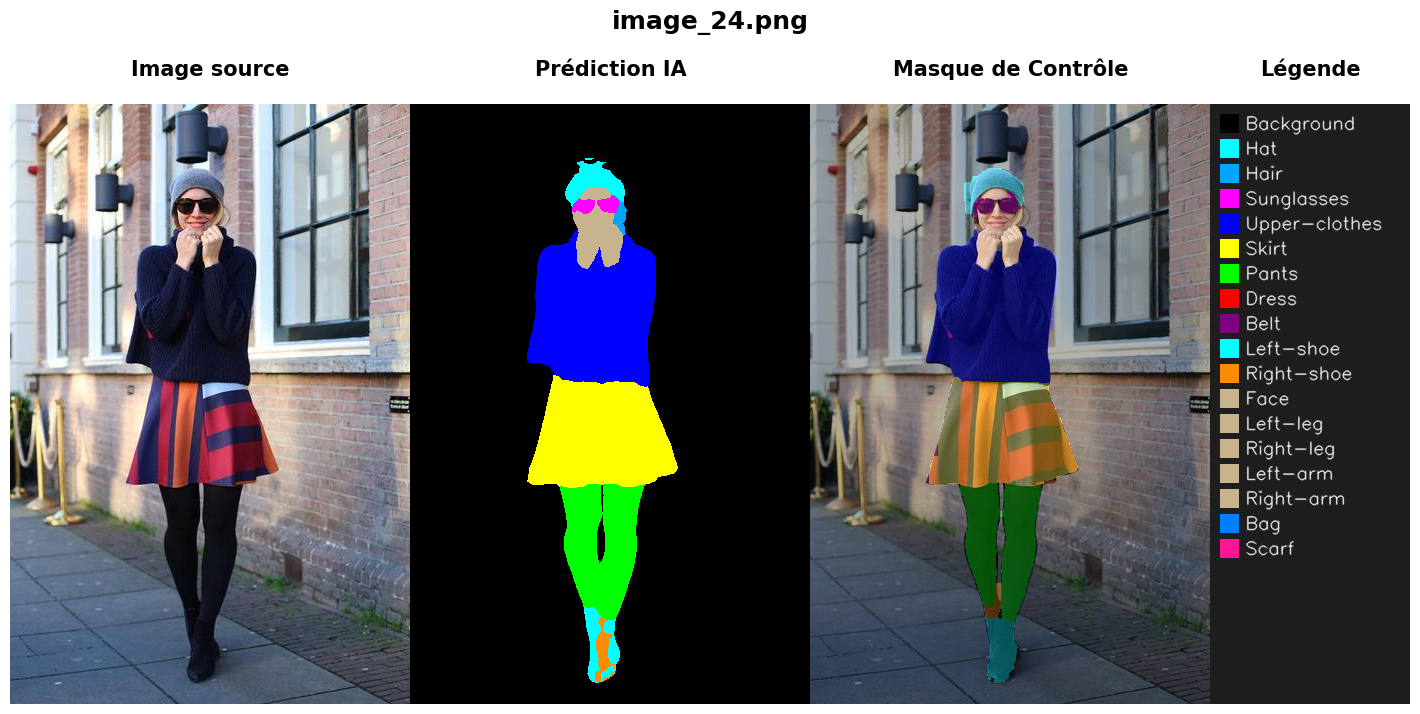

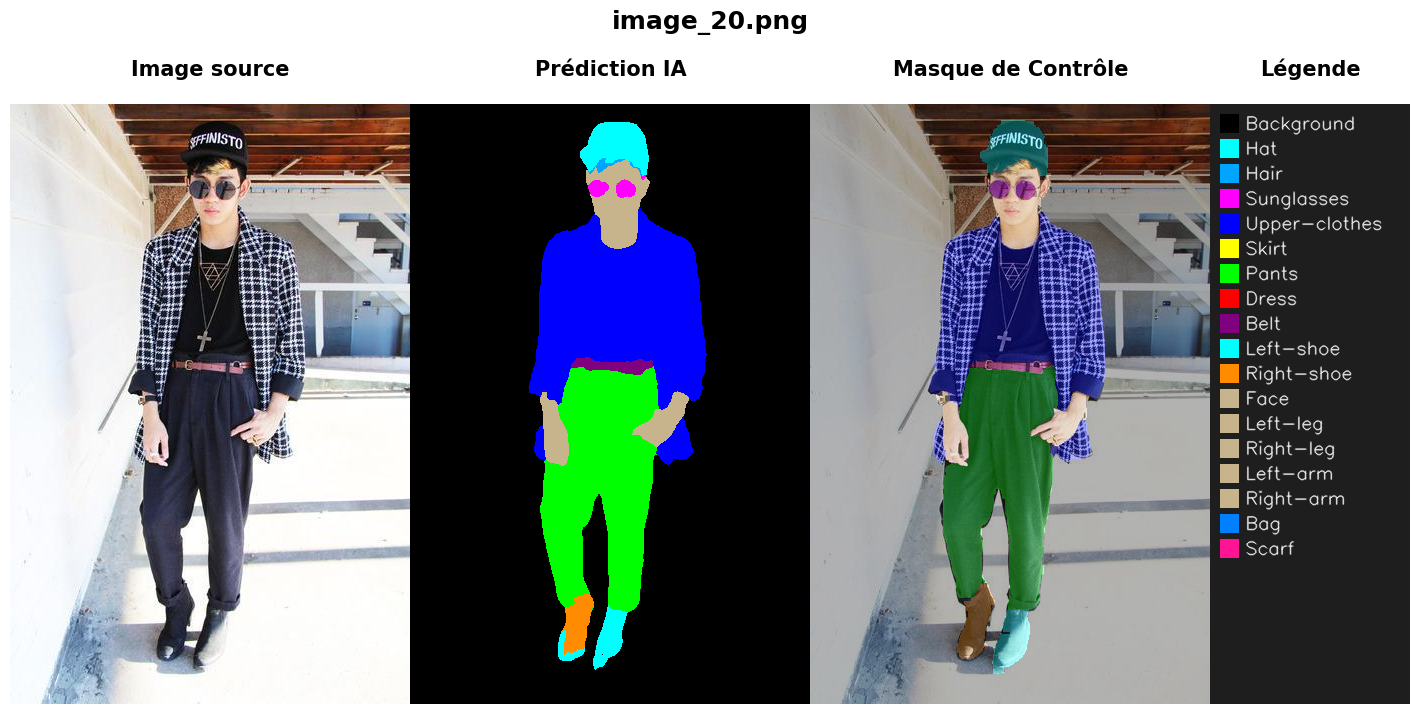

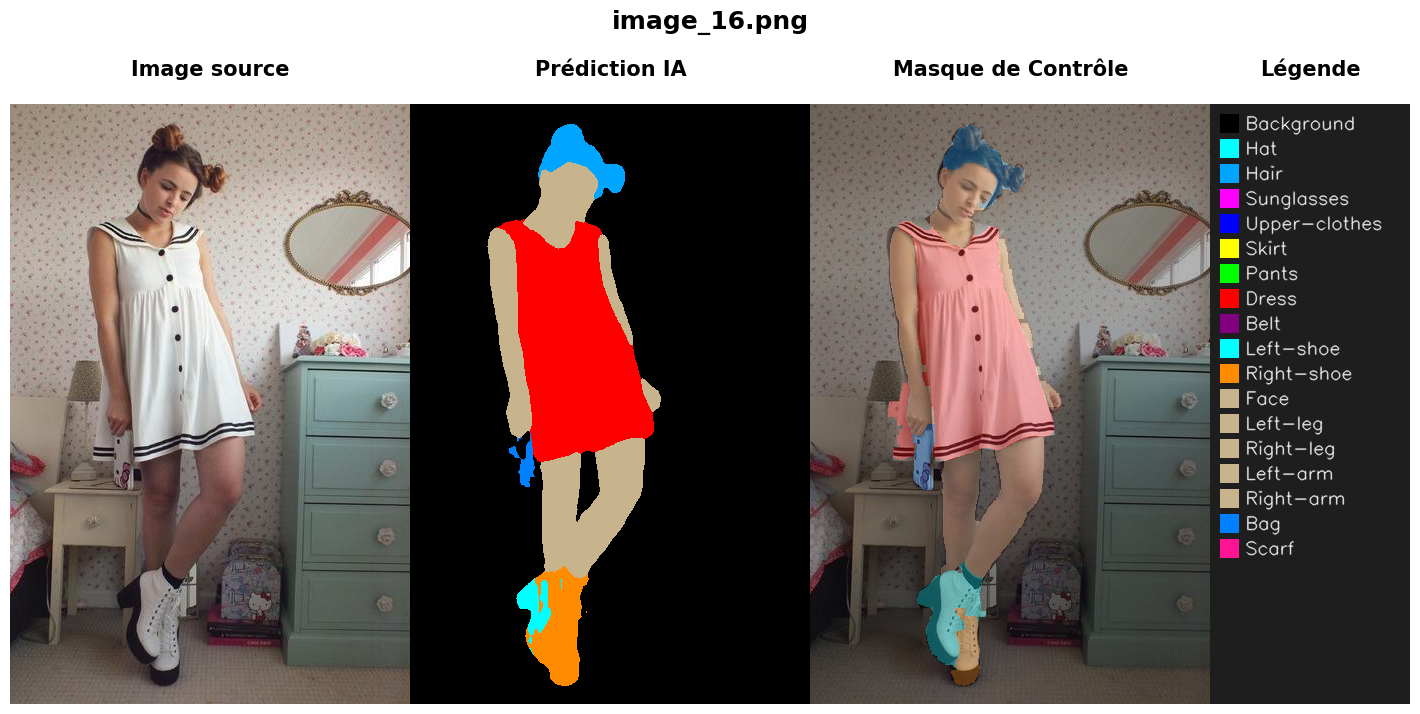

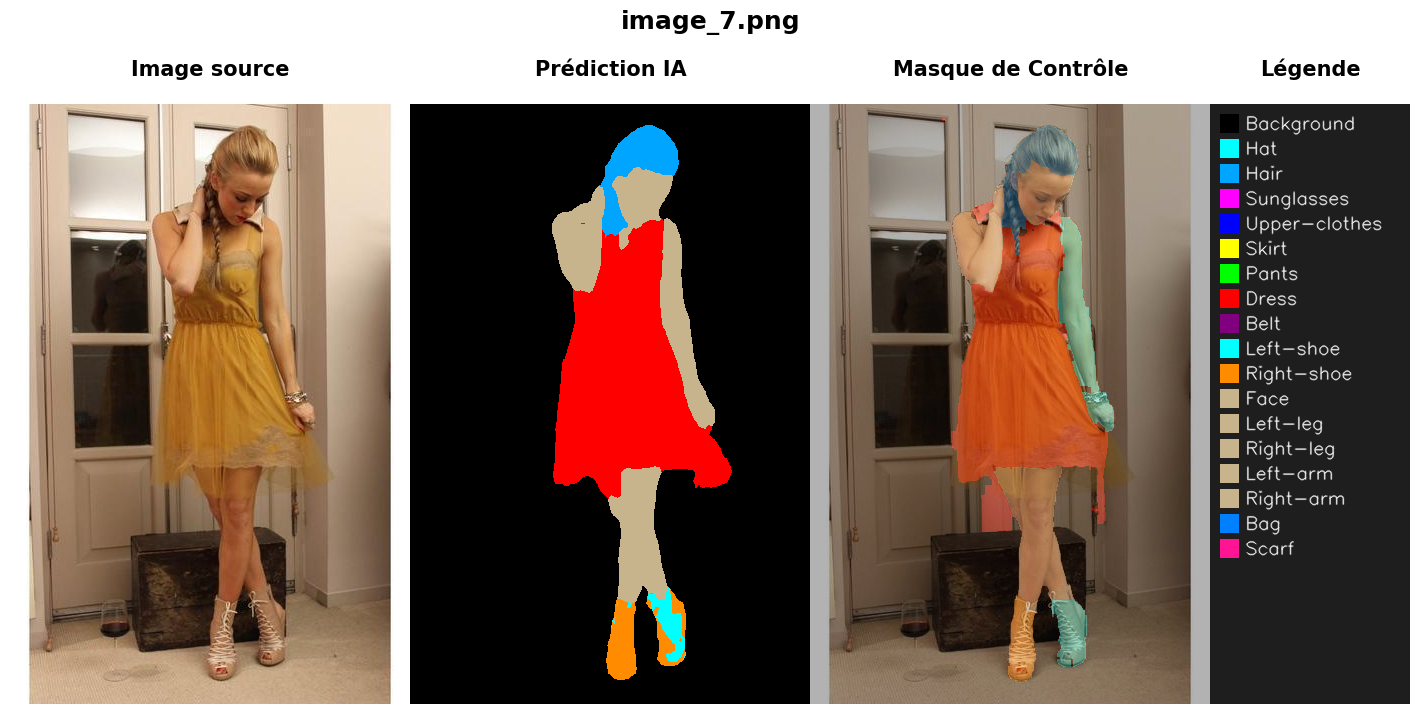

In [33]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
import cv2
import random

# Répertoires
image_dir = Path('..') / 'data' / 'raw' / 'images'
mask_pred_dir = Path('..') / 'data' / 'processed'
mask_annot_dir = Path('..') / 'data' / 'raw' / 'annotations'

custom_colormap = {
    0: (0, 0, 0), 1: (0, 255, 255), 2: (0, 165, 255), 3: (255, 0, 255), 4: (0, 0, 255),
    5: (255, 255, 0), 6: (0, 255, 0), 7: (255, 0, 0), 8: (128, 0, 128), 9: (0, 255, 255),
    10: (255, 140, 0), 11: (200, 180, 140), 12: (200, 180, 140), 13: (200, 180, 140),
    14: (200, 180, 140), 15: (200, 180, 140), 16: (0, 128, 255), 17: (255, 20, 147)
}
legend_labels = {
    0: "Background", 1: "Hat", 2: "Hair", 3: "Sunglasses", 4: "Upper-clothes",
    5: "Skirt", 6: "Pants", 7: "Dress", 8: "Belt", 9: "Left-shoe", 10: "Right-shoe",
    11: "Face", 12: "Left-leg", 13: "Right-leg", 14: "Left-arm", 15: "Right-arm",
    16: "Bag", 17: "Scarf"
}

def colorize_mask(mask, colormap):
    color_mask = np.zeros((*mask.shape, 3), dtype=np.uint8)
    for label, color in colormap.items():
        color_mask[mask == label] = color
    return color_mask

def make_vertical_legend(colormap, legend, height, box_size=18, spacing=7, margin=10, font_scale=0.6):
    n = len(legend)
    img_height = max(height, n * (box_size + spacing) + margin * 2)
    img_width = 200
    legend_img = np.zeros((img_height, img_width, 3), dtype=np.uint8) + 30
    y = margin
    for label, name in legend.items():
        color = colormap.get(label, (255,255,255))
        cv2.rectangle(legend_img, (margin, y), (margin + box_size, y + box_size), color, -1)
        cv2.putText(legend_img, name, (margin + box_size + spacing, y + box_size - 3),
                    cv2.FONT_HERSHEY_SIMPLEX, font_scale, (240,240,240), 1, cv2.LINE_AA)
        y += box_size + spacing
    return legend_img

# Récupère la liste des images
images = sorted(image_dir.glob('image_*.png'))
if len(images) < 4:
    raise RuntimeError(f"Seulement {len(images)} images trouvées dans le dossier {image_dir}, 4 requises.")
images = random.sample(images, 4)  # Sélectionne 4 images au hasard

for img_path in images:
    idx = img_path.stem.split('_')[-1]
    pred_path = mask_pred_dir / f'pred_{idx}.png'
    true_path = mask_annot_dir / f'mask_{idx}.png'

    if not (pred_path.exists() and true_path.exists()):
        continue

    img_arr = np.array(Image.open(img_path).convert("RGB"))
    pred_mask = np.array(Image.open(pred_path))
    true_mask = np.array(Image.open(true_path))

    mask_pred_color = colorize_mask(pred_mask, custom_colormap)
    mask_true_color = colorize_mask(true_mask, custom_colormap)
    overlay_true = cv2.addWeighted(img_arr, 0.7, mask_true_color, 0.3, 0)
    legend_img = make_vertical_legend(custom_colormap, legend_labels, height=img_arr.shape[0])
    legend_img_cropped = legend_img[:img_arr.shape[0], :, :]

    to_stack = [img_arr, mask_pred_color, overlay_true, legend_img_cropped]
    panel = np.hstack(to_stack)
    widths = [x.shape[1] for x in to_stack]
    centers = np.cumsum([0]+widths)
    x_centers = [(centers[i] + centers[i+1])//2 for i in range(len(widths))]

    titles = ["Image source", "Prédiction IA", "Masque de Contrôle", "Légende"]

    dpi = 100
    fig_height = int(panel.shape[0] / dpi) + 1
    fig_width = int(panel.shape[1] / dpi)
    fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=dpi)
    ax.imshow(panel)
    ax.axis('off')

    # Nom de l'image AU DESSUS du reste (bien centré)
    ax.text(panel.shape[1]//2, -70, img_path.name, fontsize=18, ha='center', va='bottom', fontweight='bold', color='black')

    # Sous-titres (juste au-dessus de chaque colonne)
    for xc, title in zip(x_centers, titles):
        ax.text(xc, -25, title, fontsize=15, ha='center', va='bottom', color='black', fontweight='bold')

    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.show()
    plt.close(fig)
